Jack Joiner
 - Quinn O'Conner (the GOAT)
 

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [2]:
y = mushrooms_df['type']
X = mushrooms_df.drop(columns=['type'])

ordinal_features = ['gill_attachment', 'gill_spacing', 'gill_size', 'stalk_shape', 'bruises', 'ring_number']
ordEnc = OrdinalEncoder()

cat_features = [col for col in X.columns if col not in ordinal_features]
hotEnc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  

ct = ColumnTransformer([
    ('hotEnc', hotEnc, cat_features),
    ('ordEnc', ordEnc, ordinal_features)
],
                       remainder='passthrough',
                       verbose_feature_names_out=False) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [3]:
X_train_transform = ct.fit_transform(X_train)
X_test_transform = ct.transform(X_test)

labEnc = LabelEncoder()
y_train_trans = labEnc.fit_transform(y_train)
y_test_trans = labEnc.transform(y_test)

log_reg = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)
log_reg.fit(X_train_transform, y_train_trans)
y_pred_log_reg = log_reg.predict(X_test_transform)

dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
dt = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt.fit(X_train_transform, y_train_trans)
y_pred_dt = dt.best_estimator_.predict(X_test_transform)

rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]}
rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf.fit(X_train_transform, y_train_trans)
y_pred_rf = rf.best_estimator_.predict(X_test_transform)


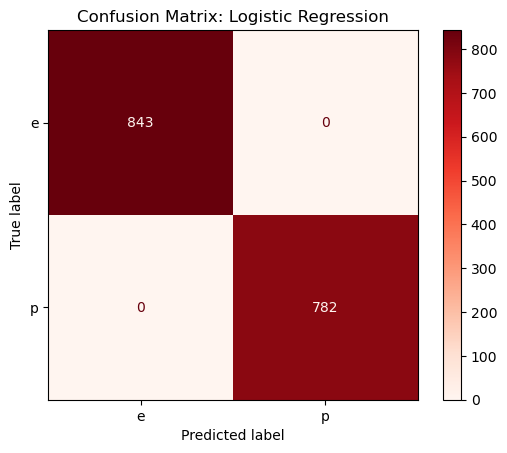

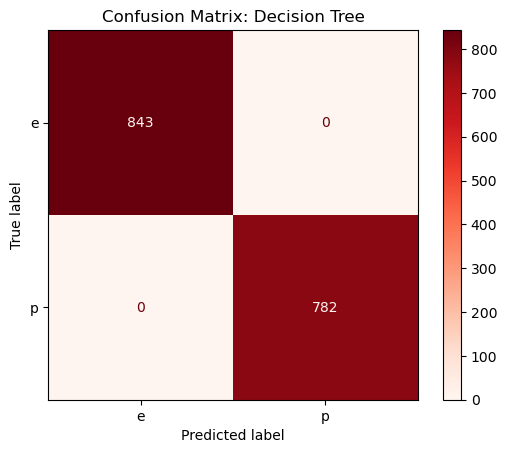

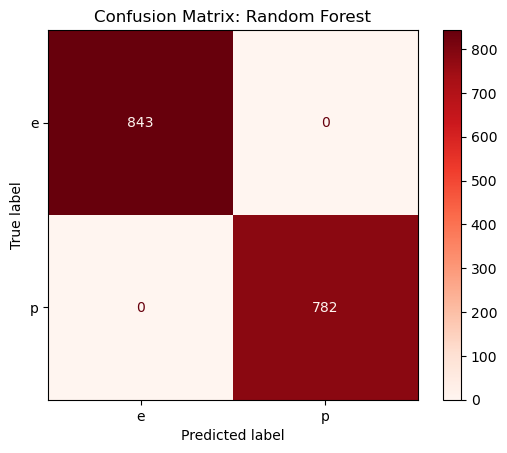

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Classification Report for Random Forest:

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1

In [4]:
models = {
    "Logistic Regression": y_pred_log_reg,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf
}

for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test_trans, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labEnc.classes_)
    disp.plot(cmap=plt.cm.Reds)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# Print classification reports
for model_name, y_pred in models.items():
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test_trans, y_pred, target_names=labEnc.classes_))

### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: Every model would work
- Hyper-parameters: max_depth, min_samples_split, n_estimators
- Metrics
    - Accuracy: 1
    - Recall: 1
    - Precision: 1
- How did you decide best? 

Data set is flawed, with the feature "odor" perfectly seperating Edible from Poisonous. Because of this, all models have perfect accuracy, recall and precision scores. 


## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

nfl_draft.head()


,Unnamed: 0,round,season,name,age,position,college_conference,height,weight,forty,vertical,broad_jump,cone,shuttle
0,0,1,2003,Dewayne Robertson,21.0,DL,NaN,6.083333,317.0,5.15,NaN,NaN,NaN,NaN
1,1,1,2003,Terence Newman,25.0,DB,Big Twelve Conference,5.833333,189.0,4.37,41.0,136.0,6.88,3.83
2,2,1,2003,Johnathan Sullivan,22.0,DL,NaN,6.250000,313.0,5.10,NaN,NaN,NaN,NaN
3,3,1,2003,Kevin Williams,23.0,DL,NaN,6.416667,304.0,4.81,30.0,112.0,7.66,5.04
4,4,1,2003,Terrell Suggs,20.0,LB,Pacific Ten Conference,6.250000,262.0,4.84,NaN,NaN,NaN,NaN


Accuracy: 0.54


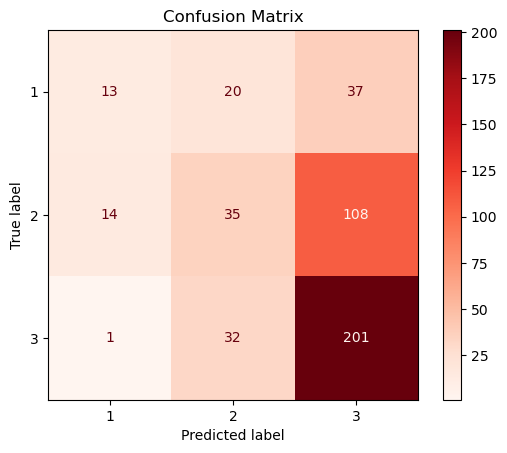

In [6]:
def map_draft_day(round_num):
    if round_num == 1:
        return 1
    elif round_num in [2, 3]:
        return 2
    else:
        return 3

nfl_draft['draft_day'] = nfl_draft['round'].apply(map_draft_day)

features = ['weight', 'forty', 'vertical', 'broad_jump', 'cone', 'shuttle', 'height', 'age']
X = nfl_draft[features]
y = nfl_draft['draft_day']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1, 2, 3])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()


### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
    I chose a Random Forest since the dataset has a lot of missing values in each columns, which Random Forests can handle quite effectively. 
 - What was your accuracy?
    I got an accuracy of .54